In [16]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *

In [17]:
path  =  "/home/sun/inputdata/f2000/"
f0  =  xr.open_dataset(path+"cami-mam3_0000-01-01_0.9x1.25_L32_c141031.nc")

vars   = ["H2SO4","T","US","VS"]
levels = [0,5,10,15,20,25] 

In [18]:
f0.lev.data

array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
        35.92325002,  43.19375008,  51.67749897,  61.52049825,
        73.75095785,  87.82123029, 103.31712663, 121.54724076,
       142.99403876, 168.22507977, 197.9080867 , 232.82861896,
       273.91081676, 322.24190235, 379.10090387, 445.9925741 ,
       524.68717471, 609.77869481, 691.38943031, 763.40448111,
       820.85836865, 859.53476653, 887.02024892, 912.64454694,
       936.19839847, 957.48547954, 976.32540739, 992.55609512])

In [19]:
f0.H2SO4

<xarray.DataArray 'H2SO4' (time: 1, lev: 32, lat: 192, lon: 288)>
[1769472 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) object 0070-01-01 00:00:00
Attributes:
    mdims:      1
    units:      kg/kg
    long_name:  H2SO4

## 绘制单层

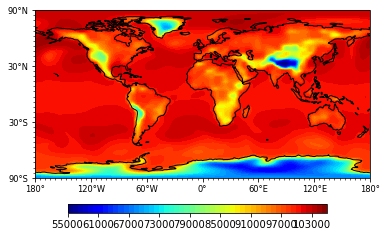

In [20]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()

ax  =  fig1.add_subplot(111,projection=proj)

set_map_ticks(ax, dx=60, dy=60, nx=10, ny=10, labelsize='small')

im  =  ax.contourf(f0.lon,f0.lat,f0.PS[0,:],60,cmap = 'jet')
ax.coastlines(resolution='110m',lw=1)

fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')

## 绘制多层

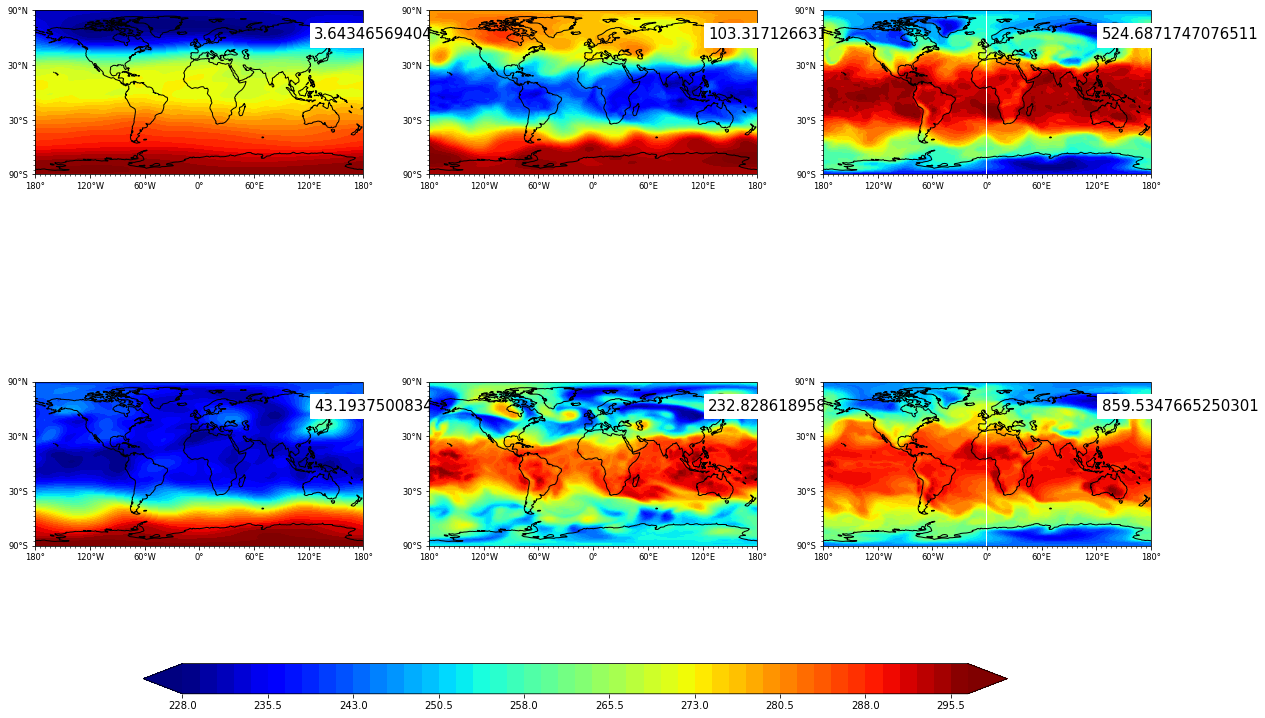

In [25]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=2,ncols=3)
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

j = 0

for col in range(3):
    for row in range(2):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=60, dy=60, nx=10, ny=10, labelsize='small')

            im  =  ax.contourf(f0.lon,f0.lat,f0.T[0,levels[j],:],50,cmap='jet',alpha=1,extend='both')
            ax.coastlines(resolution='110m',lw=1)

            ax.text(0.85,0.825,str(f0.lev.data[levels[j]]),transform=ax.transAxes,bbox=props,fontsize=15)

            

        
            j += 1
            
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')

In [31]:
f1  =  xr.open_dataset(path+"sst_HadOIBl_bc_1x1_2000climo_c180511.nc")

In [32]:
f1

<xarray.Dataset>
Dimensions:            (time: 12, lon: 360, lat: 180)
Coordinates:
  * lon                (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time               (time) object 0000-01-16 12:00:00 ... 0000-12-16 12:00:00
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:           N/A
    data_mods:         N/A
    climo_years:       1995-2005
    data_reference:    Hurrell et al, 2008: A New Sea Surface Temperature and...
    data_doi:          N/A
    data_source_url:   via dennis shea ftp://ftp.cgd.ucar.edu/archive/SSTICE/
    data_script:       regrid and bcgen under model tools
    data_creator:      Julie Caron, jcaron@ucar.edu
    cesm_contact:      Cecile Hannay, hannay@ucar.edu
    data_description:  SST and ICE boundary dataset created from merged Reyno...
    data_summary:      Climatological SST and ICE boundary dataset for CAM
    creation_date:     Fri May 11 18:57:17 MDT 2018

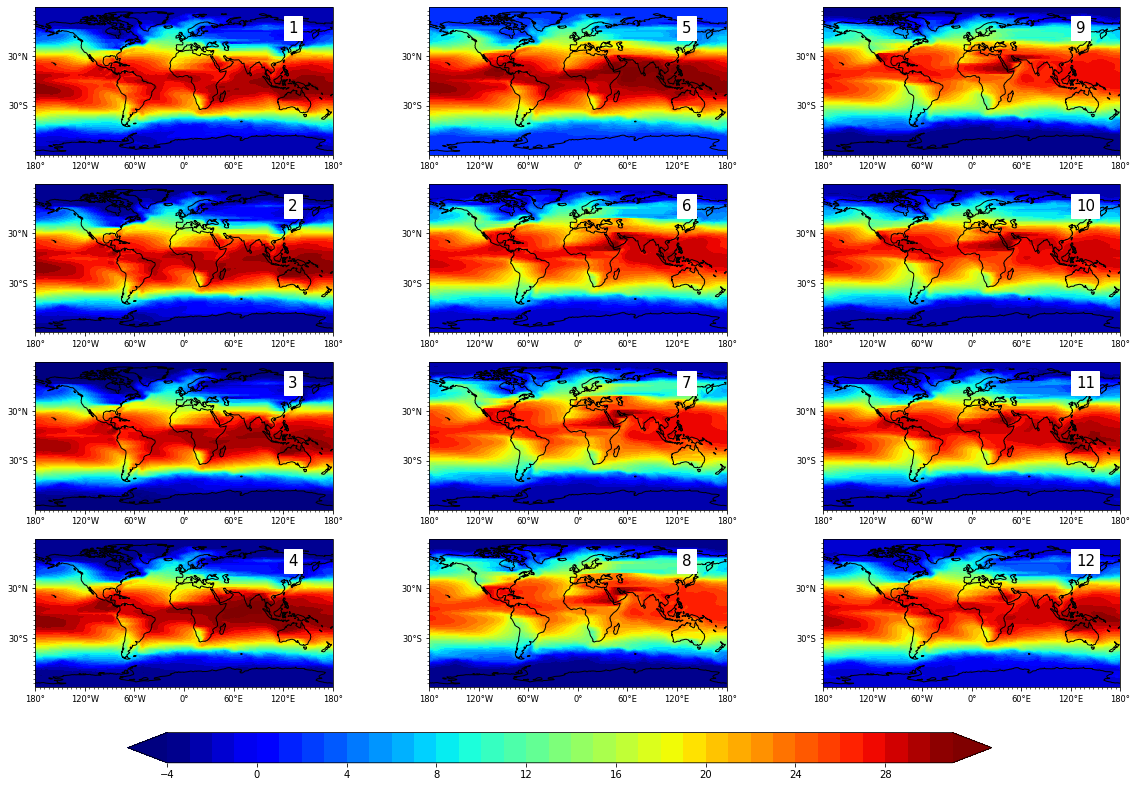

In [34]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=4,ncols=3)
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

j = 0

for col in range(3):
    for row in range(4):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=60, dy=60, nx=10, ny=10, labelsize='small')

            im  =  ax.contourf(f1.lon,f1.lat,f1.SST_cpl[j,:],40,cmap='jet',alpha=1,extend='both')
            ax.coastlines(resolution='110m',lw=1)

            ax.text(0.85,0.825,str(j+1),transform=ax.transAxes,bbox=props,fontsize=15)

            

        
            j += 1
            
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')